# Aprendizagem de Máquina I

## Hugo Tremonte de Carvalho

#### hugo@dme.ufrj.br

NOMES:
* ALUNO/A 1: Douglas Nery Barbosa

Este _notebook_ é correspondente ao nosso terceiro projeto, passado no dia 17/10/2024 e para entrega no dia 14/11/2024. Ele consiste em questões teóricas e questões práticas. A entrega da atividade deve ser feita através do Google Classroom, fazendo um _upload_ deste _notebook_, devidamente atualizado com as suas resoluções e implementações. Recomendo fortemente que façam o trabalho no Google Colab, pois assim temos certa garantia de estarmos rodando tudo no mesmo ambiente e que eu conseguir executar o código de vocês sem dificuldades.

A resolução das questões teóricas pode ser feita de duas formas:
* Escrita em $\LaTeX$ aqui no próprio Google Colab
* Escrita à mão, escaneada de modo legível, e feito o upload no Google Classroom.

A primeira alternativa é mais recomendada, por deixar o trabalho mais organizado, e cá entre nós, estar tudo em um documento só me facilita a correção! :-) mas para quem não tem fluência com $\LaTeX$ ou prefere fazer à mão, a segunda alternativa está aí. Obviamente que não haverá punição nenhuma meramente por conta da escolha de sua preferência.

O projeto poderá ser feito **até** em dupla: quem quer fazer sozinho/a faz, mas quem quiser fazer em dupla também tem esse direito.

# Parte teórica

Até o momento trabalhamos somente com classificadores binários, ou seja, alocam as observações em duas classes. O problema a ser tratado nesse projeto é sobre um classificador multiclasse. Descreva detalhadamente como se generalizam classificadores binários para o cenário multiclasse. Repare que os classificadores que vimos até o momento do presente projeto (Bayes Ingênuo Gaussiano, LDA e QDA) são naturalmente multiclasse, porém veremos mais à frente classificadores que não têm essa propriedade, de modo que alguma teoria adicional é necessária. Você verá algumas siglas como OvO e OvA, explique-as detalhadamente e discuta vantagens e desvantagens de cada uma delas. Finalmente, sobre as métricas: somente as apresentamos no cenário de classificação binária. Descreva detalhadamente como se generalizam as métricas que aprendemos para problemas multiclasse.

A generalização de modelos binários para modelos multiclasse se da a partir de um princípio simples. Eu construo vários modelos binários e utilizo estratégias como One-vs-One(OvO) e One-vs-All(OvA) para decidir ao receber uma nova observação dos dados, qual será a sua classe de atribuição.

One-vs-One (OvO): É uma estratégia que consiste em construir para um cenário de L classes, L(L-1)/2 classificadores binários para construir duelos de classificadores. O objetivo é, dada uma nova observação ao nosso modelo, todos os classificadores são consultados, e uma votação majoritária (ou outro critério) é usada para determinar a classe final.

No treinamento de cada classificador, são utilizados apenas os dados referentes a uma dupla de classes que serão confrontadas, ou seja, treinar com dados reduzidos pode levar a matrizes de covariância mais estáveis o que ajuda em problemas com muitas classes.

EX: Um problema de 3 classes irá gerar um modelo com 3 classificadores. Dada uma nova observação, teremos
class1 x class2 = A
class1 x class3 = B
class2 x class3 = A
Então essa nova observação será atribuida a classe A. Pois foi a mais votada.

One-vs-All (OvA): Nessa estratégia, ao ter um problema de L classes, criamos L classificadores binários que decidem entre "uma classe" vs "todas outras classes". Nesse contexto, dada uma nova observação, haverá uma predição para cada classificador e o que obtiver o maior score ou probabilidade será atribuido a observação.

No treinamento de cada classificador, são utilizados todos os dados da base. Nesse contexto, um classificador irá atribuir a classe positiva um dado elemento da classe L e todos outros serão atribuidos a classe negativa do mesmo. Isso não é bom em cenários em que existem muitas classes porque pode gerar um desbalanceamento entre alta acurácia geral, mas baixo desempenho em capturar eventos raros.

# Parte prática

O objetivo do projeto é trabalhar com a base de dados MNIST ("*Modified National Institute of Standards and Technology*"). Tal base consiste de 70.000 imagens de tamanho 28 x 28, em tons de cinza, contendo dígitos manuscritos, e o principal objetivo com ela é identificar qual é o dígito em questão. Algoritmos extremamente sofisticados (e pesadíssimos!) chegam a atingir uma taxa de erro de 0,17%, mas aqui vamos trabalhar os bem mais simples Naive Bayes e análises de discriminante.

Faça uma análise exploratória dos dados, treine e valide o desempenho dos seguintes classificadores, que vimos em aula: Bernoulli Naive Bayes, Gaussian Naive Bayes, LDA e QDA. Discuta a adequabilidade das hipóteses de cada um deles à base de dados, e com isso discuta o desempenho de suas respectivas classificações. Dentre esses quatro, escolha por um "melhor" classificador, e justifique a performance de cada um deles.

*Obs.: Você pode baixar a base através do `sklearn` diretamente, através dos comandos a seguir:*

`from sklearn.datasets import fetch_openml`

`X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=True)`

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay, confusion_matrix, roc_curve
from sklearn.datasets import fetch_openml


import numpy as np

import scipy.stats as stats

In [ ]:
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=True)

In [ ]:
dados = X.copy()
dados['target'] = y
dados.head()

pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel10  ...  pixel776  pixel777  pixel778  pixel779  pixel780  pixel781  \
0        0  ...         0         0         0         0         0         0   
1        0  ...         0         0         0         0         0         0   
2        0  ...         0         0         0         0         0         0   
3        0  ...         0         0         0         0         0         0   
4        0  ...         0         0         0         0         0         0   

   pixel782  pixel783  pixel784  target  
0         0         0         0       5  
1         0         0         0       0  
2         0         0         0       4  
3         0         0         0       1  
4         0         0         0       9  

[5 rows x 785 columns]

In [ ]:
X.head()

pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0        0  ...         0         0         0         0         0         0   
1        0  ...         0         0         0         0         0         0   
2        0  ...         0         0         0         0         0         0   
3        0  ...         0         0         0         0         0         0   
4        0  ...         0         0         0         0         0         0   

   pixel781  pixel782  pixel783  pixel784  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 784 columns]

In [ ]:
X.dtypes

pixel1      int64
pixel2      int64
pixel3      int64
pixel4      int64
pixel5      int64
            ...  
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
pixel784    int64
Length: 784, dtype: object

In [ ]:
y.dtypes

CategoricalDtype(categories=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], ordered=False, categories_dtype=object)

In [ ]:
y = pd.to_numeric(y)
y.dtypes

dtype('int64')

In [ ]:
y

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: int64

In [ ]:
y.value_counts()

class
1    7877
7    7293
3    7141
2    6990
9    6958
0    6903
6    6876
8    6825
4    6824
5    6313
Name: count, dtype: int64

In [ ]:
X.describe()

pixel1   pixel2   pixel3   pixel4   pixel5   pixel6   pixel7   pixel8  \
count  70000.0  70000.0  70000.0  70000.0  70000.0  70000.0  70000.0  70000.0   
mean       0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
std        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
min        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
25%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
50%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
75%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
max        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

        pixel9  pixel10  ...      pixel775      pixel776      pixel777  \
count  70000.0  70000.0  ...  70000.000000  70000.000000  70000.000000   
mean       0.0      0.0  ...      0.197414      0.099543      0.046629   
std        0.0      0.0  ...      5.991206      4.256304      2.783732   
min        0.0      0.0  ...      0.000000      0.000000      0.000000   
25%        0.0      0.0  ...      0.000000      0.000000      0.000000   
50%        0.0      0.0  ...      0.000000      0.000000      0.000000   
75%        0.0      0.0  ...      0.000000      0.000000      0.000000   
max        0.0      0.0  ...    254.000000    254.000000    253.000000   

           pixel778      pixel779      pixel780  pixel781  pixel782  pixel783  \
count  70000.000000  70000.000000  70000.000000   70000.0   70000.0   70000.0   
mean       0.016614      0.012957      0.001714       0.0       0.0       0.0   
std        1.561822      1.553796      0.320889       0.0       0.0       0.0   
min        0.000000      0.000000      0.000000       0.0       0.0       0.0   
25%        0.000000      0.000000      0.000000       0.0       0.0       0.0   
50%        0.000000      0.000000      0.000000       0.0       0.0       0.0   
75%        0.000000      0.000000      0.000000       0.0       0.0       0.0   
max      253.000000    254.000000     62.000000       0.0       0.0       0.0   

       pixel784  
count   70000.0  
mean        0.0  
std         0.0  
min         0.0  
25%         0.0  
50%         0.0  
75%         0.0  
max         0.0  

[8 rows x 784 columns]

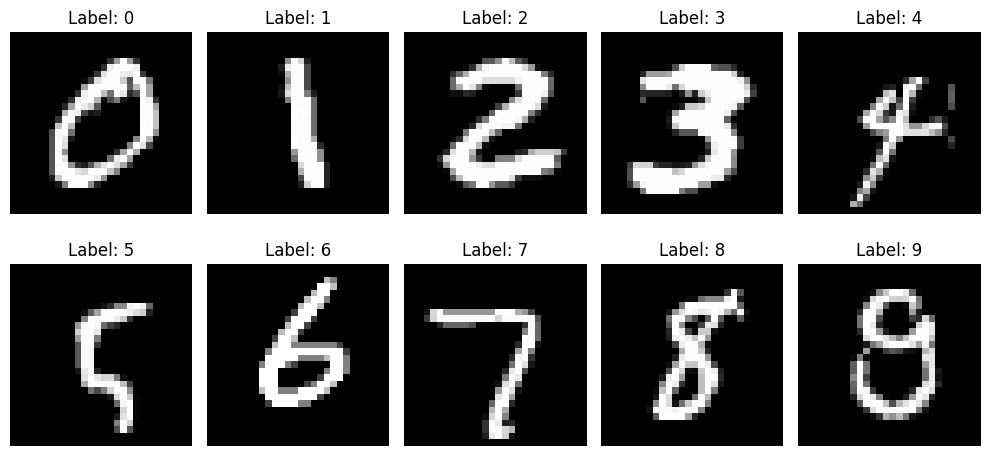

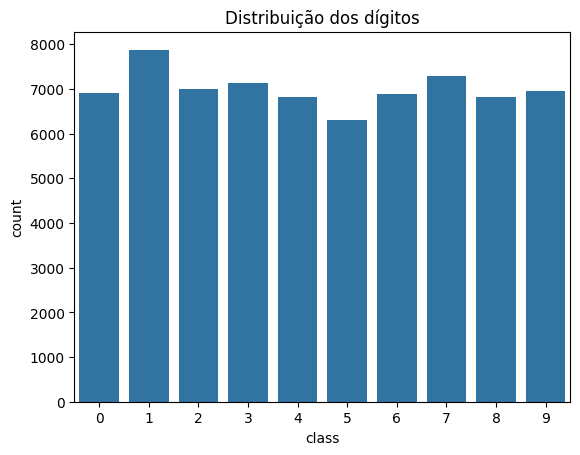

In [ ]:

fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(X[y == i].iloc[i].values.reshape(28, 28), cmap="gray")
    ax.set_title(f"Label: {i}")
    ax.axis("off")
plt.tight_layout()
plt.show()

sns.countplot(x=y)
plt.title("Distribuição dos dígitos")
plt.show()


### Bernouli NB

In [ ]:
from sklearn.preprocessing import Binarizer

X_bin = pd.DataFrame(Binarizer(threshold=0).fit_transform(X))
X_bin50 = pd.DataFrame(Binarizer(threshold=50).fit_transform(X))
X_bin180 = pd.DataFrame(Binarizer(threshold=180).fit_transform(X))

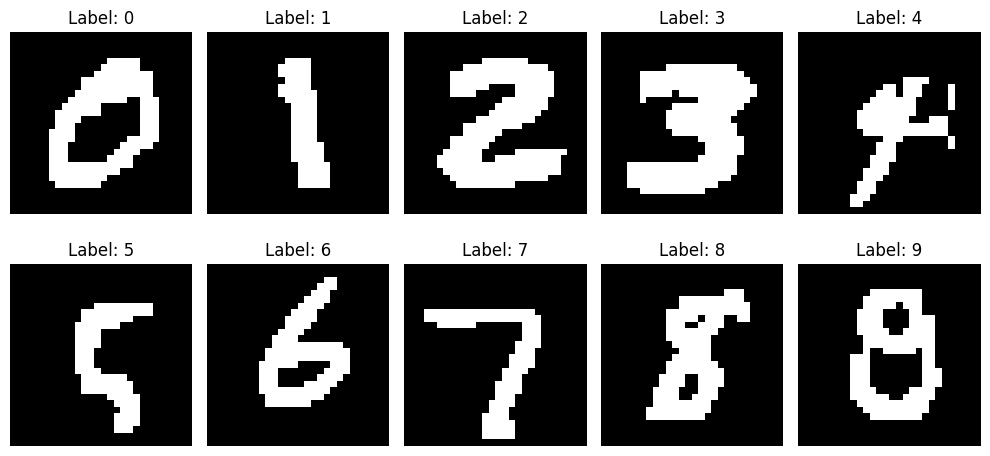

In [ ]:
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(X_bin[y == i].iloc[i].values.reshape(28, 28), cmap="gray")
    ax.set_title(f"Label: {i}")
    ax.axis("off")
plt.tight_layout()
plt.show()

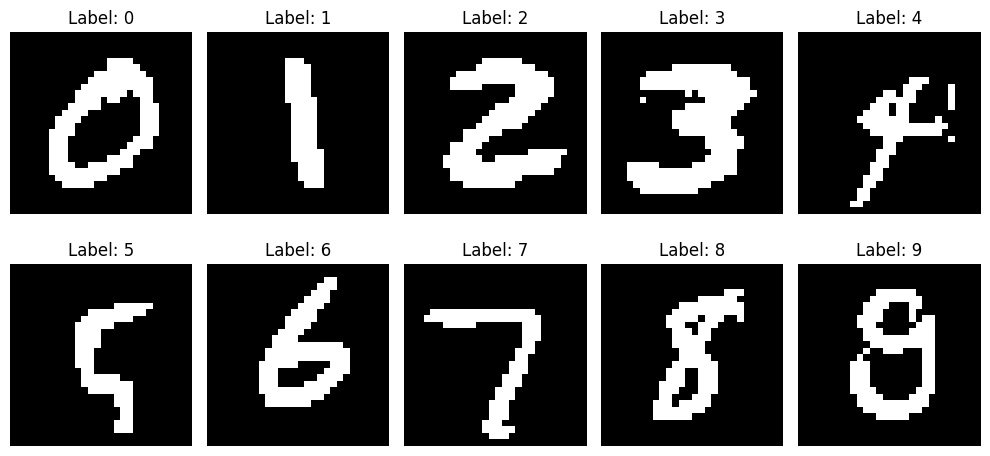

In [ ]:
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(X_bin50[y == i].iloc[i].values.reshape(28, 28), cmap="gray")
    ax.set_title(f"Label: {i}")
    ax.axis("off")
plt.tight_layout()
plt.show()

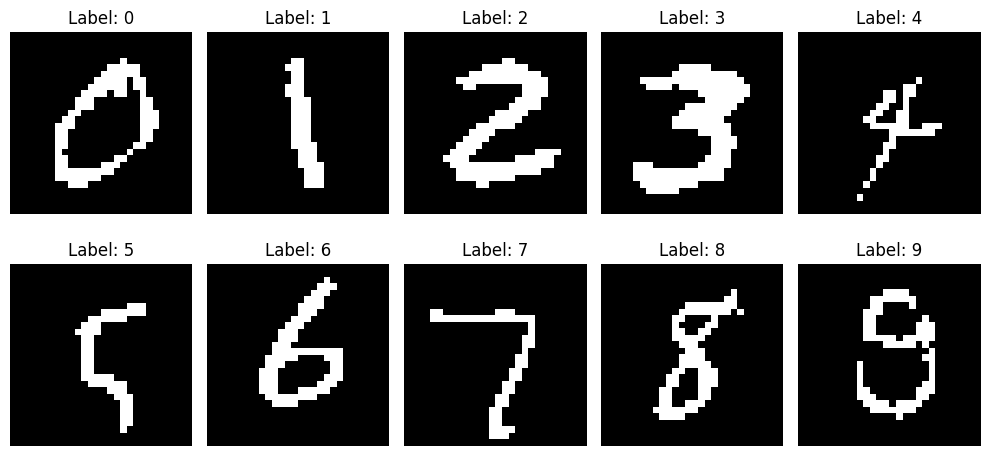

In [ ]:
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(X_bin180[y == i].iloc[i].values.reshape(28, 28), cmap="gray")
    ax.set_title(f"Label: {i}")
    ax.axis("off")
plt.tight_layout()
plt.show()

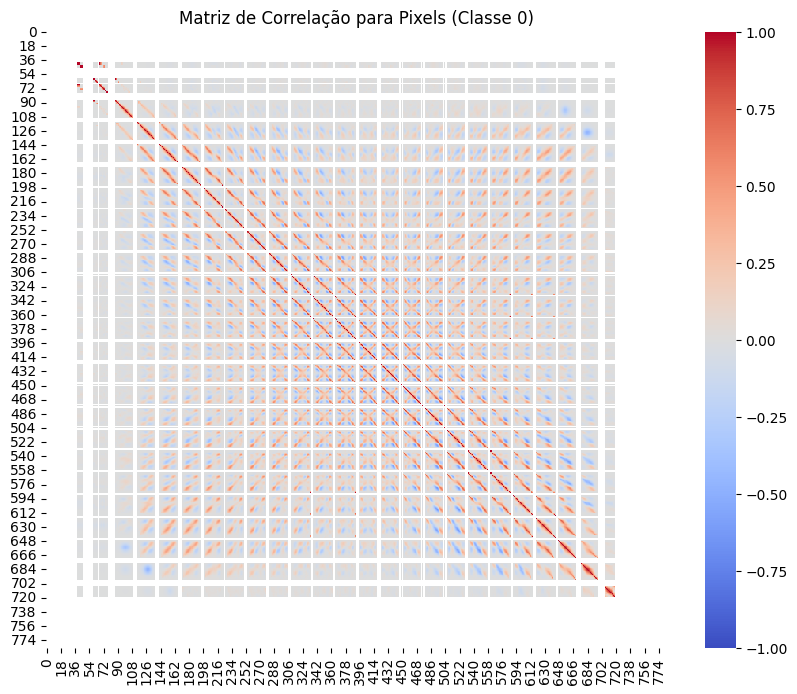

In [ ]:
corr_matrix = pd.DataFrame(X_bin[y == 0]).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação para Pixels (Classe 0)')
plt.show()

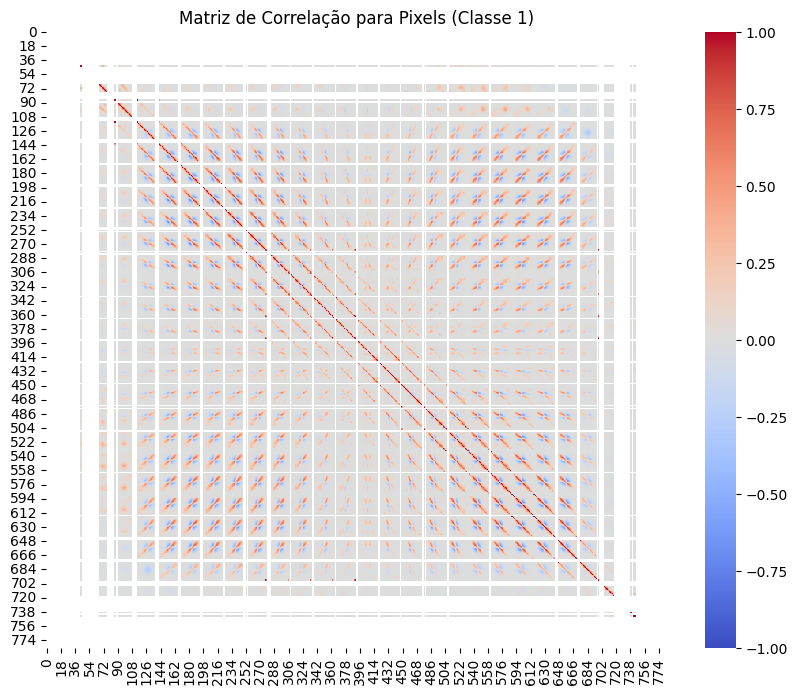

In [ ]:
corr_matrix = pd.DataFrame(X_bin[y == 1]).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação para Pixels (Classe 1)')
plt.show()

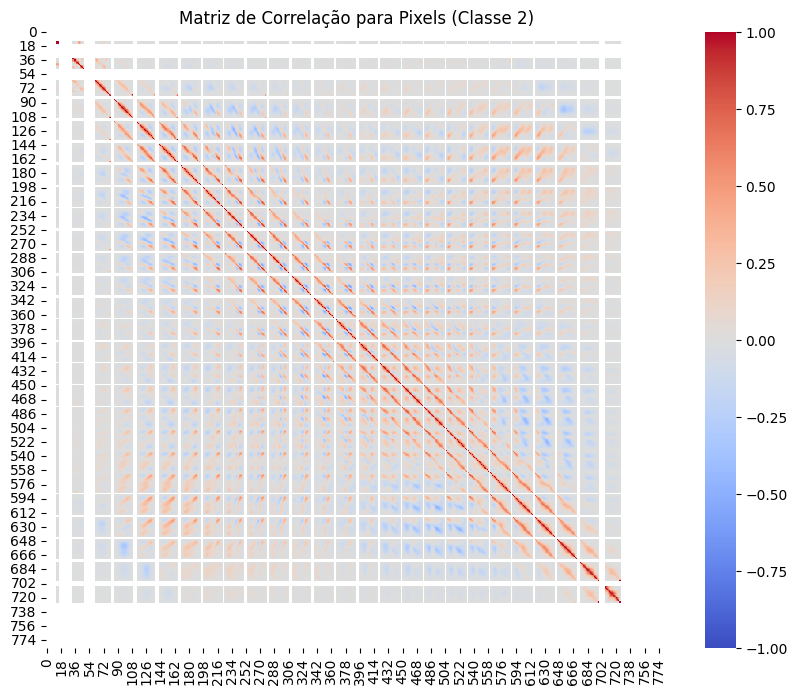

In [ ]:
corr_matrix = pd.DataFrame(X_bin[y == 2]).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação para Pixels (Classe 2)')
plt.show()

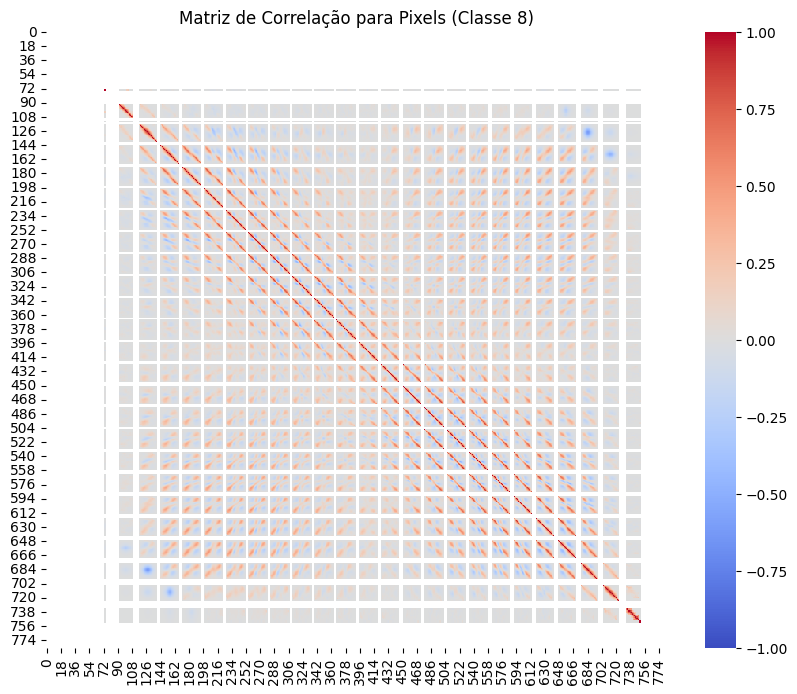

In [ ]:
corr_matrix = pd.DataFrame(X_bin[y == 8]).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação para Pixels (Classe 8)')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_bin, y, test_size = 0.33, stratify = y)
X_train50, X_test50, y_train, y_test = train_test_split(X_bin50, y, test_size = 0.33, stratify = y)
X_train180, X_test180, y_train, y_test = train_test_split(X_bin180, y, test_size = 0.33, stratify = y)

In [ ]:
modelo_bin = BernoulliNB().fit(X_train, y_train)
modelo_bin50 = BernoulliNB().fit(X_train50,y_train)
modelo_bin180 = BernoulliNB().fit(X_train180,y_train)

In [ ]:
modelo_bin.predict(X_test)

array([1, 8, 5, ..., 5, 5, 5])

In [ ]:
print(modelo_bin.score(X_test, y_test))
print(modelo_bin50.score(X_test50, y_test))
print(modelo_bin180.score(X_test180, y_test))

0.1003030303030303
0.09792207792207792
0.8305627705627706


Modelo 1 - Binarizado com threshold 0


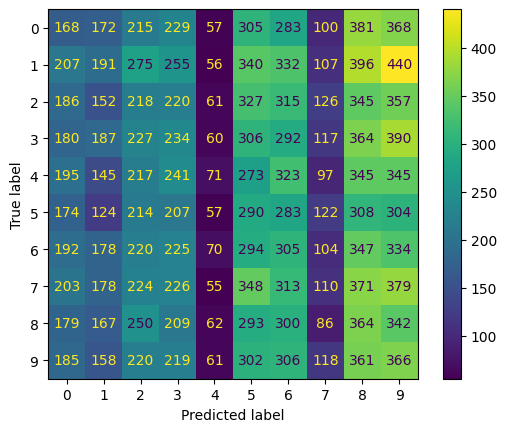

In [ ]:
print("Modelo 1 - Binarizado com threshold 0")
ConfusionMatrixDisplay.from_estimator(modelo_bin, X_test, y_test)

Esse resultado é esperado, pois ao verificar a matriz de confusão para o caso do threshold = 0, podemos ver que eles não possuem independência.

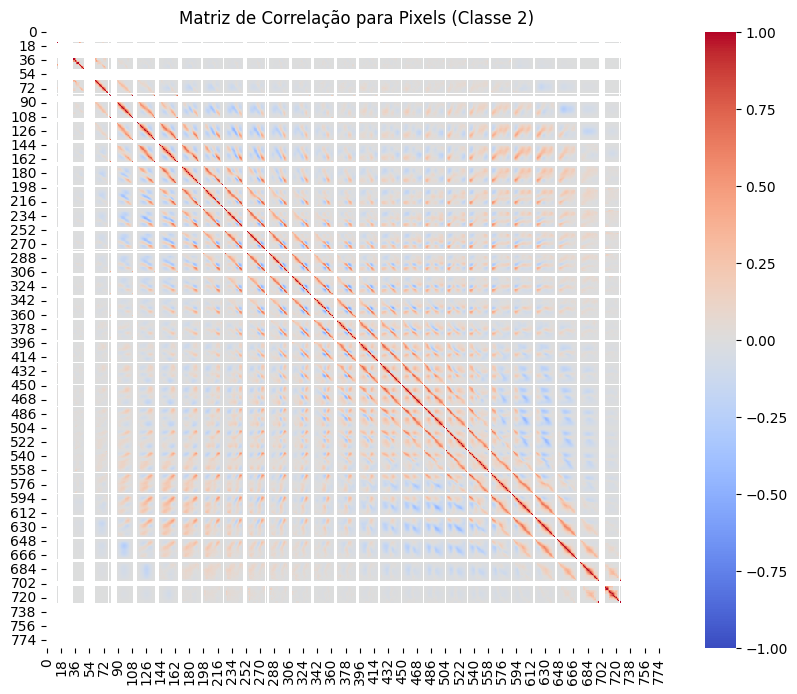

In [ ]:
corr_matrix = pd.DataFrame(X_bin50[y == 2]).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação para Pixels (Classe 2)')
plt.show()

Modelo 1 - Binarizado com threshold 50


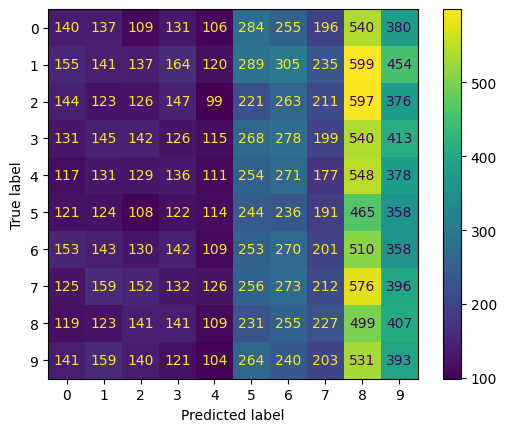

In [ ]:
print("Modelo 1 - Binarizado com threshold 50")
ConfusionMatrixDisplay.from_estimator(modelo_bin50, X_test50, y_test)

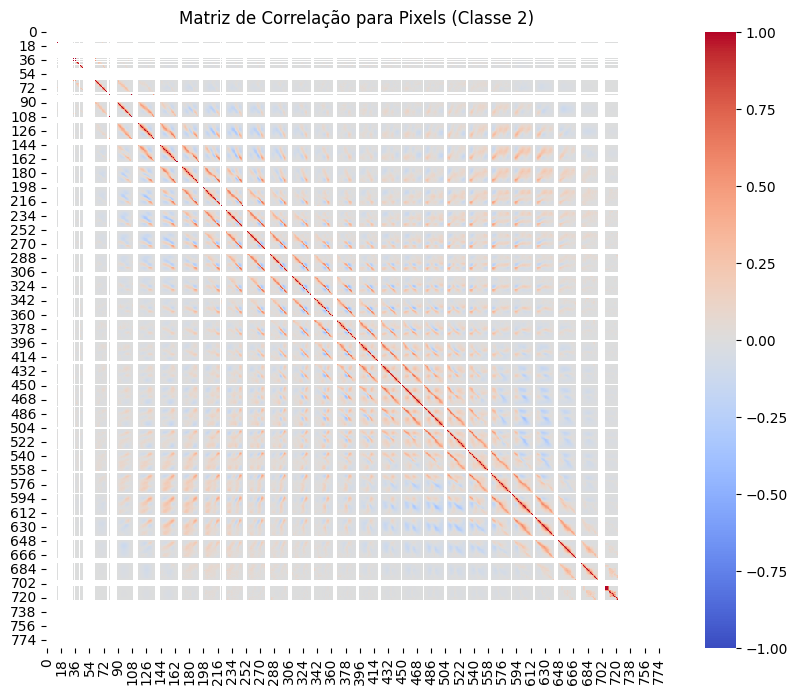

In [ ]:
corr_matrix = pd.DataFrame(X_bin180[y == 2]).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação para Pixels (Classe 2) com threshold 180')
plt.show()

Verificando a matriz de correlação ao utilizar um threshold maior (180) é possível notar que a correlação entre os dados diminui e isso explica a melhora significativa nos resultados.

Modelo 1 - Binarizado com threshold 180


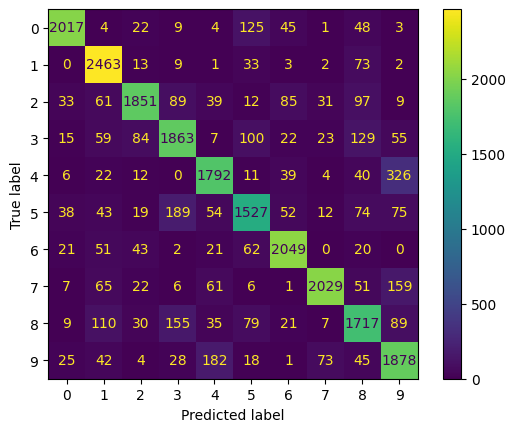

In [ ]:
print("Modelo 1 - Binarizado com threshold 180")
ConfusionMatrixDisplay.from_estimator(modelo_bin180, X_test180, y_test)

### Gaussian NB, LDA e QDA

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, stratify = y)

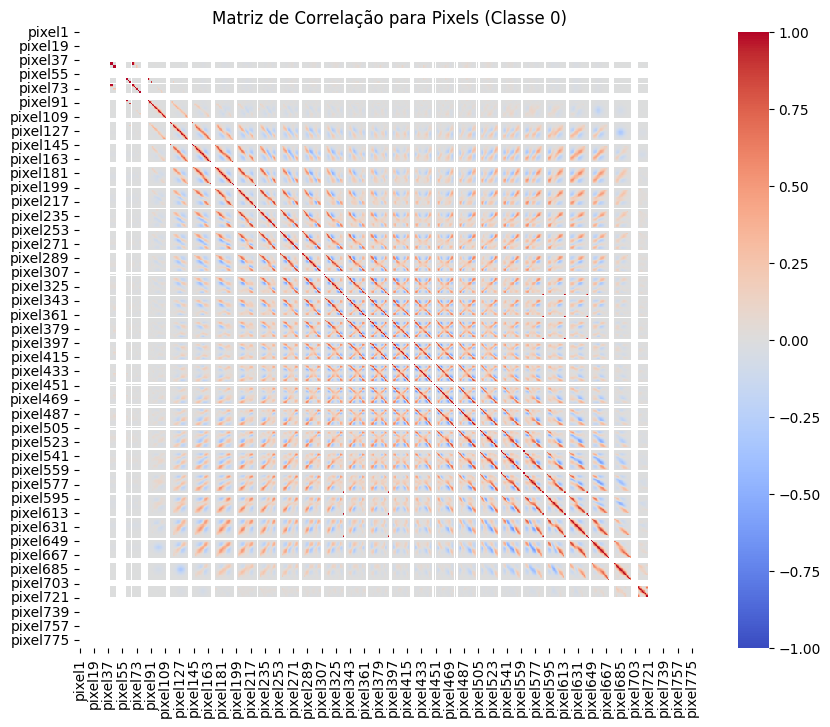

In [ ]:
corr_matrix = X[y == 0].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação para Pixels (Classe 0)')
plt.show()

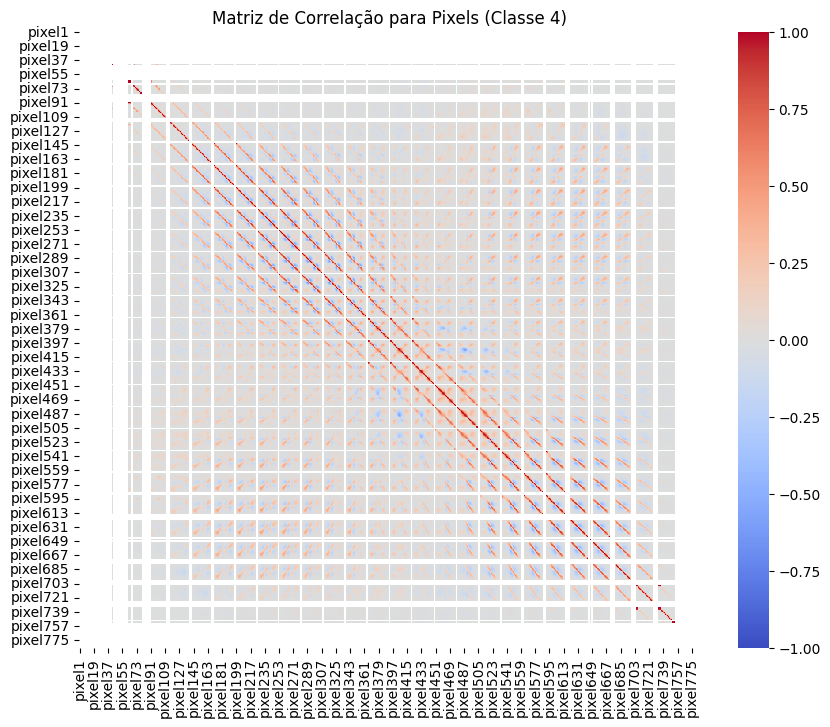

In [ ]:
corr_matrix = X[y == 4].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação para Pixels (Classe 4)')
plt.show()

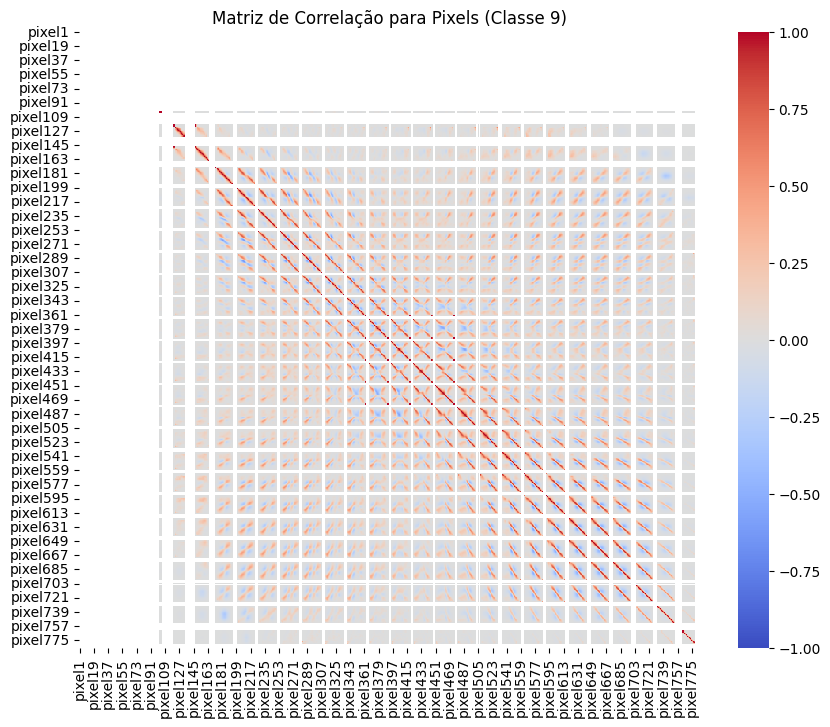

In [ ]:
corr_matrix = X[y == 9].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação para Pixels (Classe 9)')
plt.show()

É possível observar que os dados são correlacionados o que quebra nossa hipótese de existir independência entre os dados com relação a uma determinada classe.

In [ ]:
SSGNB = Pipeline(steps = [('Scaler', StandardScaler()),
                         ('GNB', GaussianNB())])
SSLDA = Pipeline(steps = [('Scaler', StandardScaler()),
                         ('LDA', LinearDiscriminantAnalysis())])
SSQDA = Pipeline(steps = [('Scaler', StandardScaler()),
                         ('QDA', QuadraticDiscriminantAnalysis())])
GNB = GaussianNB()

In [ ]:
SSGNB.fit(X_train, y_train)
SSLDA.fit(X_train, y_train)
SSQDA.fit(X_train, y_train)
GNB.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


GaussianNB()

In [ ]:
print(SSGNB.score(X_test, y_test))
print(SSLDA.score(X_test, y_test))
print(SSQDA.score(X_test, y_test))
print(GNB.score(X_test, y_test))

0.5257575757575758
0.8677489177489177
0.5411255411255411
0.5502164502164503


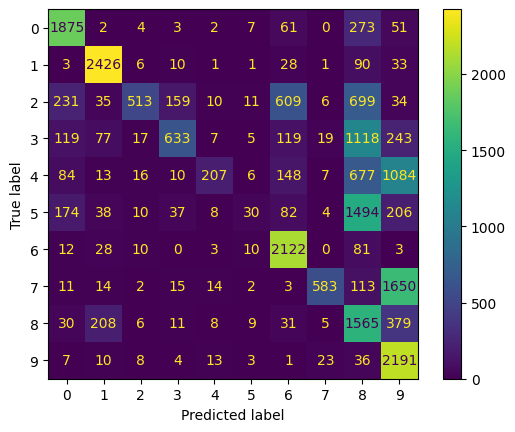

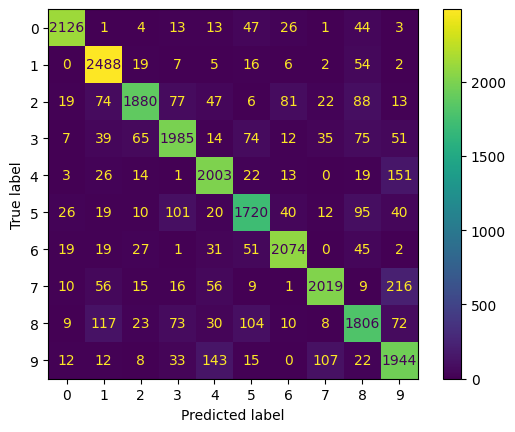

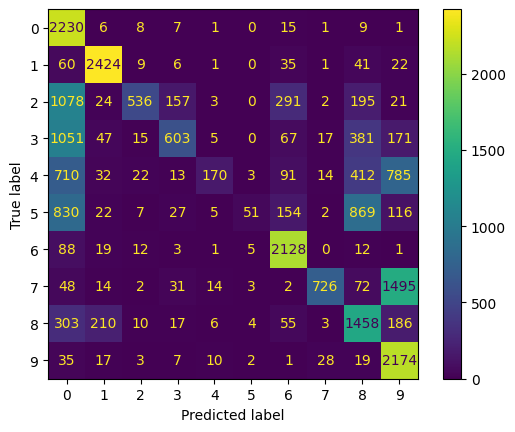

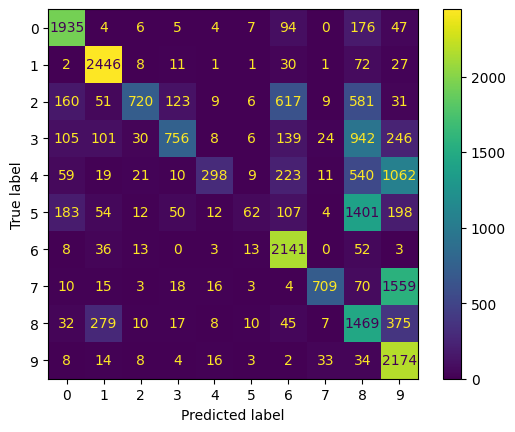

In [ ]:
ConfusionMatrixDisplay.from_estimator(SSGNB, X_test, y_test)
ConfusionMatrixDisplay.from_estimator(SSLDA, X_test, y_test)
ConfusionMatrixDisplay.from_estimator(SSQDA, X_test, y_test)
ConfusionMatrixDisplay.from_estimator(GNB, X_test, y_test)

### Resultado

O modelo LDA foi o que melhor performou durante os testes apresentando um score de aproximadamente 87%, em segundo lugar ficou o modelo BernouliNB com threshold 180 que obteve um score de 83%.

Resposta final: Modelo LDA.